Welcome to the hands-on lab on Writing Test Assertions. We use assertions as checks to determine if the results of our test have passed or failed: True means passed and False means failed. What about assertions is that they raise an exception if they evaluate to False, marking the test as failed.

In this lab, you will learn how to write test assertions for test cases.

# Learning Objectives

After completing this lab, you will be able to:
* Run test cases with Nose
* Identify failing test cases
* Write unit tests using assertions

# Set Up the Lab Environment

## Clone repo

Now get the code that you need to test. To do this, use the `git clone` command to clone the git repository:

**`git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git`**

Your output should look similar to the image below:

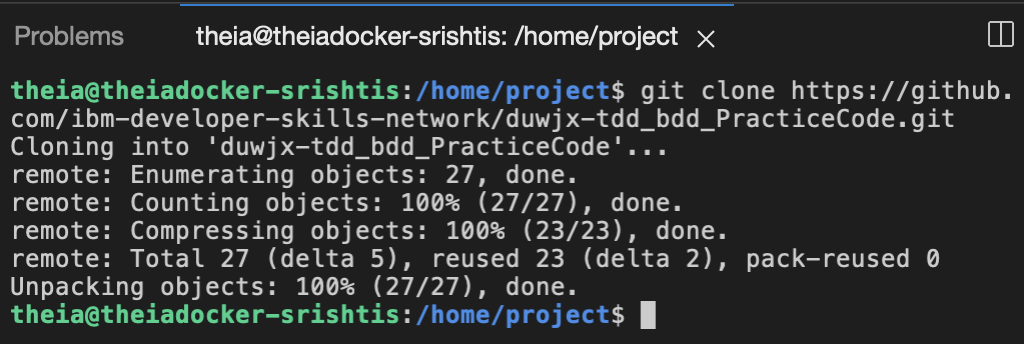

## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory.

`cd duwjx-tdd_bdd_PracticeCode/labs/02_writing_test_assertions/`

List the contents of this directory to see the artifacts for this lab.

`ls -l`

The directory should look like the listing below:

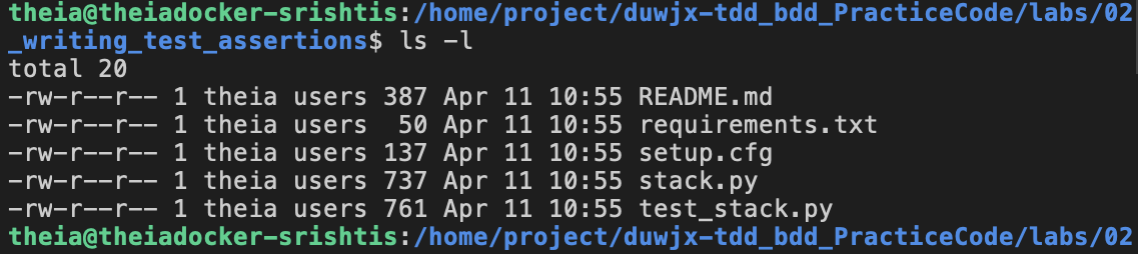

> *You must have a few exercise files that you will be running in the steps to follow.*

The final preparation step is to use `pip` to install the Python packages needed for the lab:

`python3.8 -m pip install -r requirements.txt`

# Working with the test files

You to use two files from the lab folder: `stack.py` and `test_stack.py`.
* `stack.py` has the code you want to test.
* `test_stack.py` has the test skeleton with test cases for `push()`, `pop()`, `peek()`, and `is_empty()` methods. Currently, each test raises an exception.

To complete this lab, you will edit the test cases in the `test_stack.py` file and supply the proper implementation.

# Review: The Stack

Before you write test cases, review the methods that the `Stack` class implements:

```
"""Implements a Stack data structure"""
class Stack:
    def push(self, data: Any) -> None: 
    def pop(self) -> Any:
    def peek(self) -> Any:
    def is_empty(self) -> bool:
```

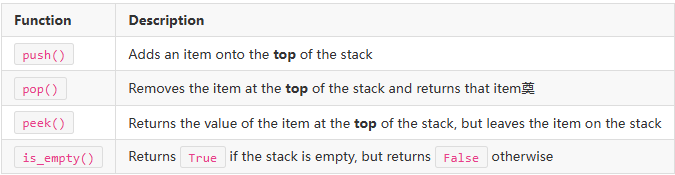

> *Notice that all of the methods except `is_empty()` operate on the item at the **top** of the stack. Therefore, for your test cases to be thorough, two or more items must be on the stack to ensure that you are manipulating the **top** item and not the **bottom** item.*

# Running nosetests

Before writing any code, you should always check that the test cases are passing. 

Otherwise, if they fail, you won’t know if you broke the code or if someone or something else broke the code before you started.

Run **`nosetests`** to see what these test cases return:

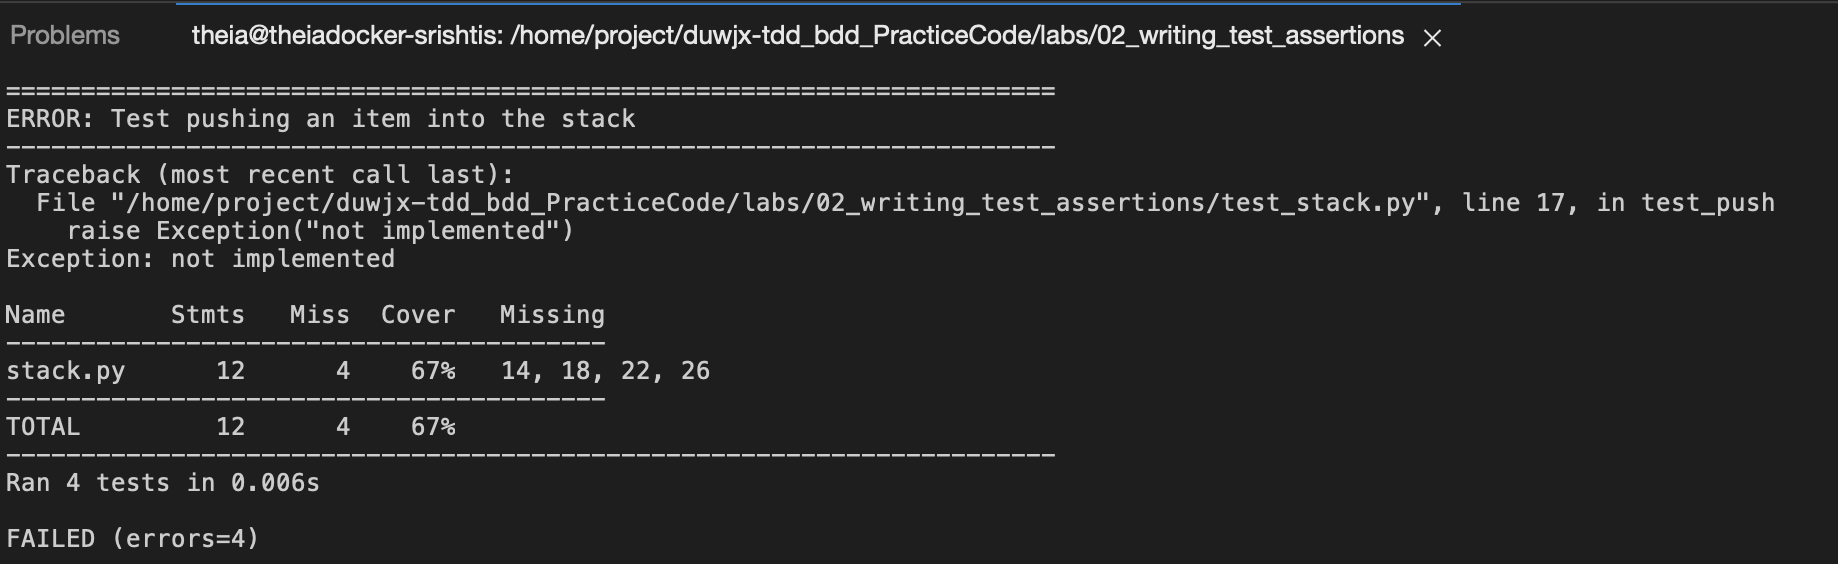

Scroll up in the terminal to see that all test cases are listed in **red**, meaning they failed. 

They failed because they all simply raise a **“not implemented”** exception. This is to remind you of where you need to add new test cases.

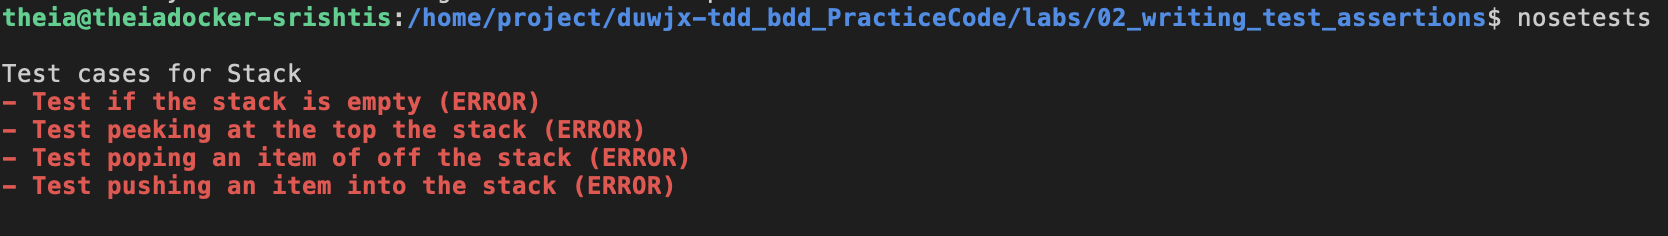

The output shows that each test case has thrown an exception as expected. 

So now you need to write some code to make these test cases pass.


# Finding the first error

Nosetests has an option **`--stop`** that will stop running tests at the first failing test case. You will use this option throughout this lab to find the next failing test case.

Run **`nosetests --stop`** to find out which test you should work on first.

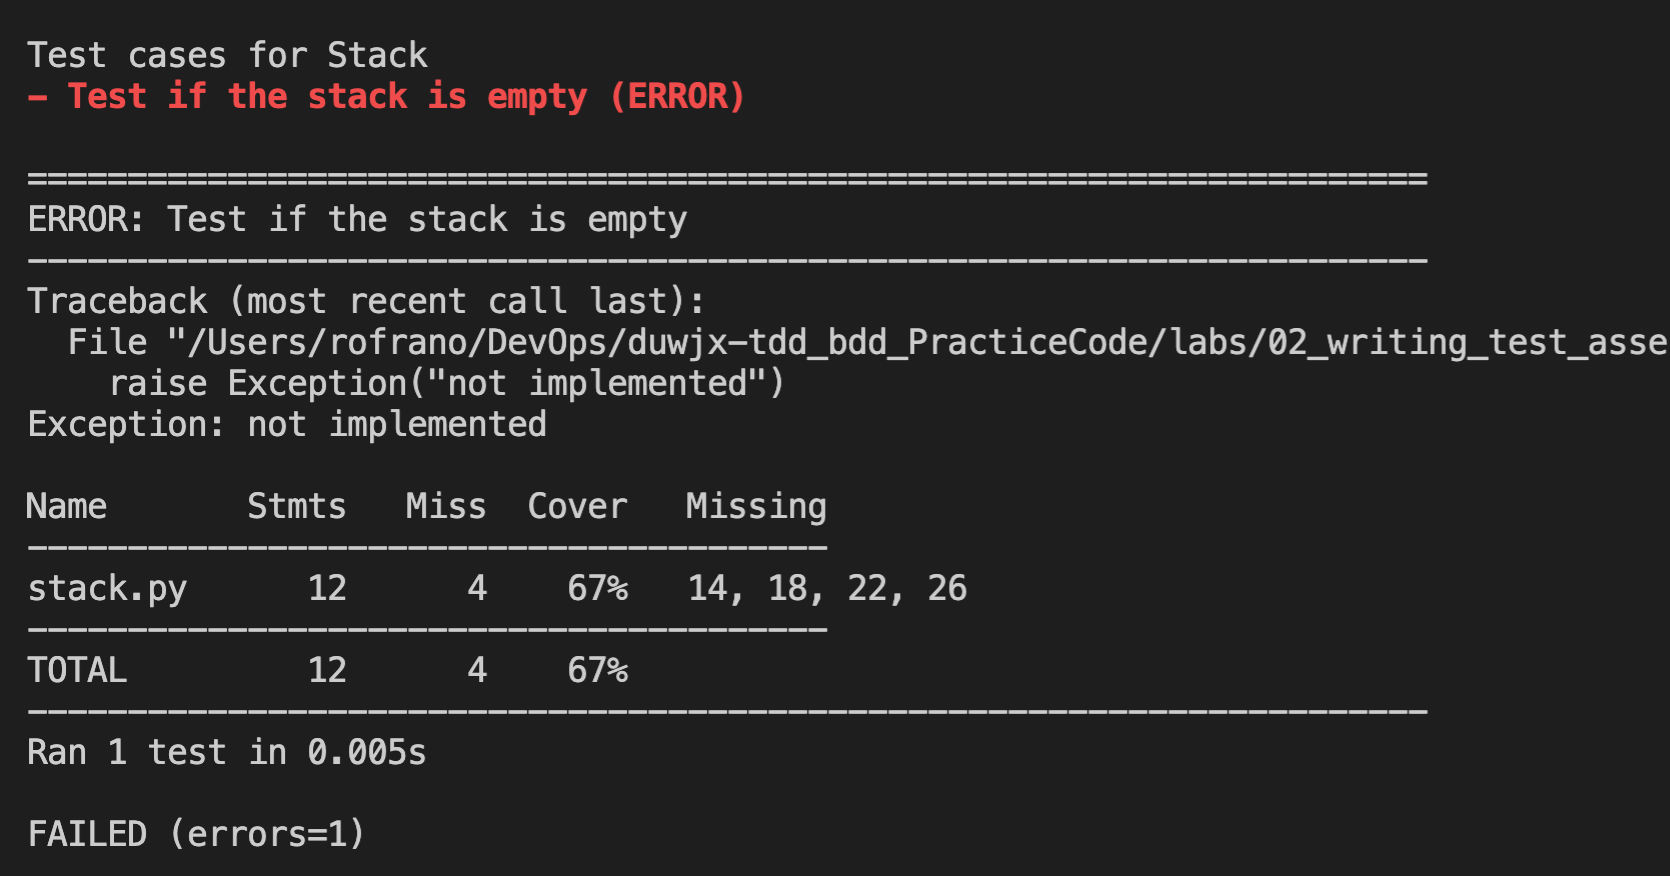

Nosetests stops at the first failing test case which is **Test if the stack is empty**

> *Notice that **“Test if the stack is empty”** is not the first test case in `test_stack.py`. Nose runs tests in a pseudo-random order. This is to ensure that test cases do not affect the order of execution or depend on it to work.*

# Step 1: Testing the is_empty() method

Your first failing test case is **Test if the stack is empty**, which is implemented in the **`test_is_empty()`** method. This method returns **`True`** if the stack is empty and **`False`** if it is not empty. You must test both outcomes to ensure that both scenarios are tested.

## Your Task

Write a test case that tests both possible outcomes of `is_empty()`.
* If you view the `setUp()` method, you're that it creates a new `Stack`.
* The initial stack should be empty, so your first assertion could check that.
* But confirming that `is_empty()` returns `True` when the stack is empty isn’t enough;
* You also need to confirm that the method returns `False` when the stack isn’t empty.
* You need both assertions to test all possible outcomes.

## Solution

In [3]:
def test_is_empty(self):
    """Test if the stack is empty"""
    self.assertTrue(self.stack.is_empty())
    self.stack.push(5)
    self.assertFalse(self.stack.is_empty())

## Test Your Solution

Run **`nosetests --stop`** again and note whether `test_is_empty()` passes

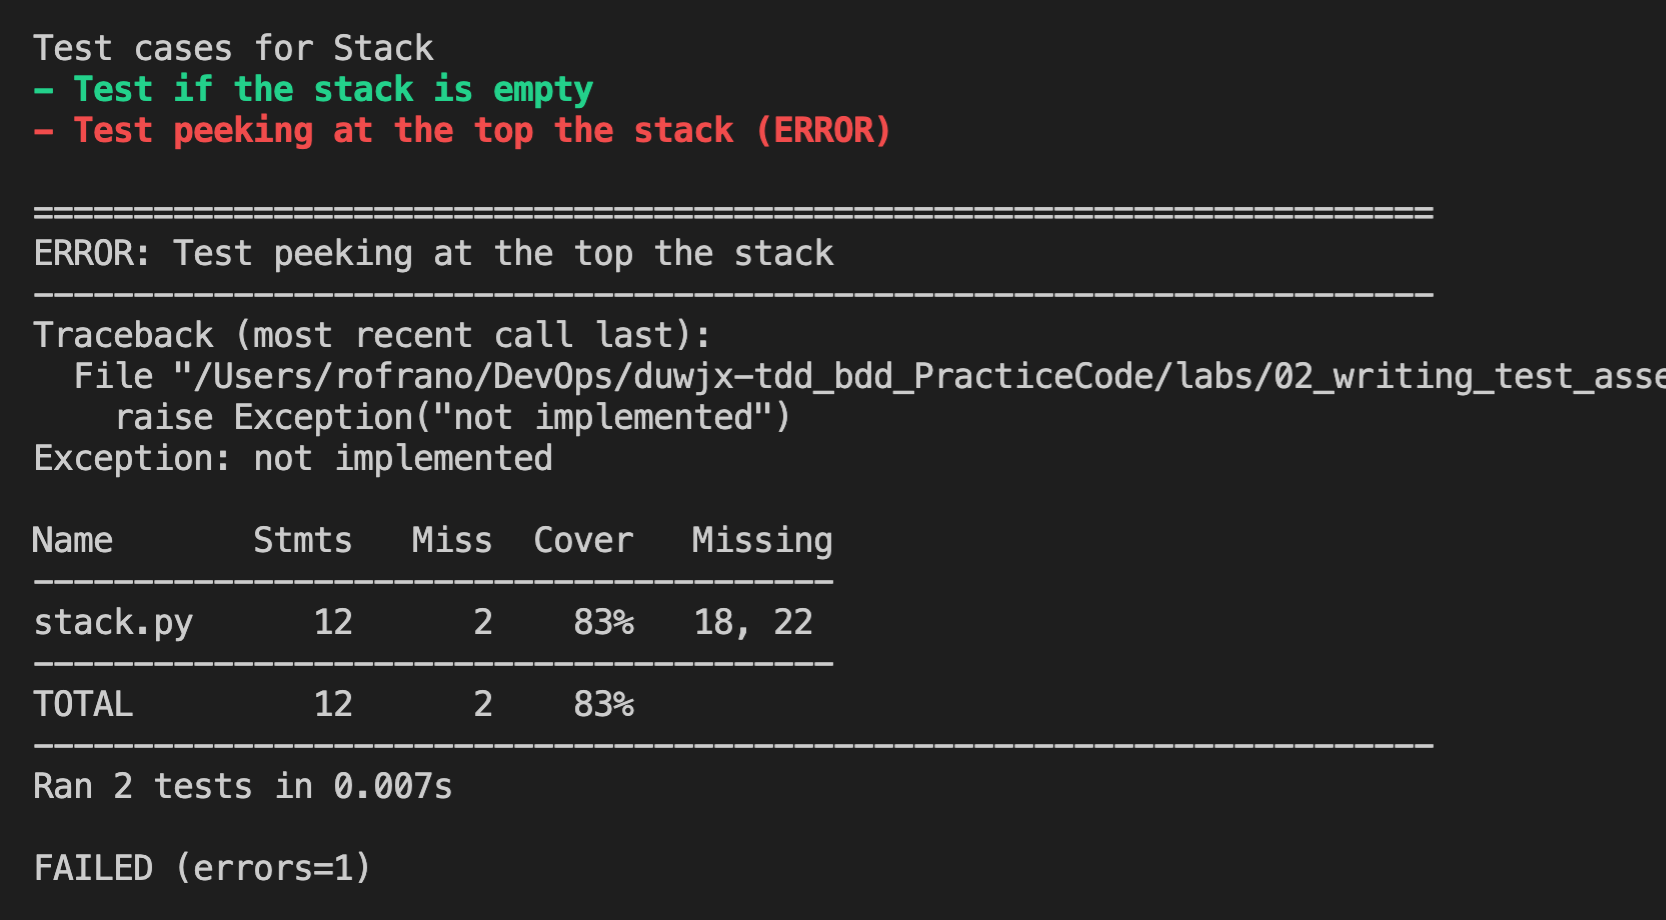

You should find that
* `Test if the stack is empty` **passed** and
* `Test peeking at the top the stack` is your **next failing test case**.

You're on Test peeking at the top the stack next.

# Step 2: Testing the peek() method

The next test case that you will implement is the `test_peek()` method.

The `peek()` method returns the value at the top of the stack. It is non-destructive and does not remove the value like `pop()` does. If you call `peek()` several times in a row without altering the stack, it should return the same value every time.

## Your Task

Write a test case for `peek()`.
* To test `peek()` you need to have something on the stack. 
* First you need to `push()` a value onto the stack.
* But does that give you enough for a useful test case?
* `peek()` should return the value at the top of the stack.
* But if the stack only has one value, the top and the bottom are the same value.
* How do you know that `peek()` is not returning the value at the bottom of the stack?
* You need to push a second value to make the bottom value and the top value different.
* Then you must `assert` that `peek()` returns that last value that you pushed onto the stack.

## Solution

In [4]:
def test_peek(self):
    """Test peeking at the top the stack"""
    self.stack.push(3)
    self.stack.push(5)
    self.assertEqual(self.stack.peek(), 5)

## Test Your Solution

Let’s run **`nosetests --stop`** again and see if test_peek() passes.

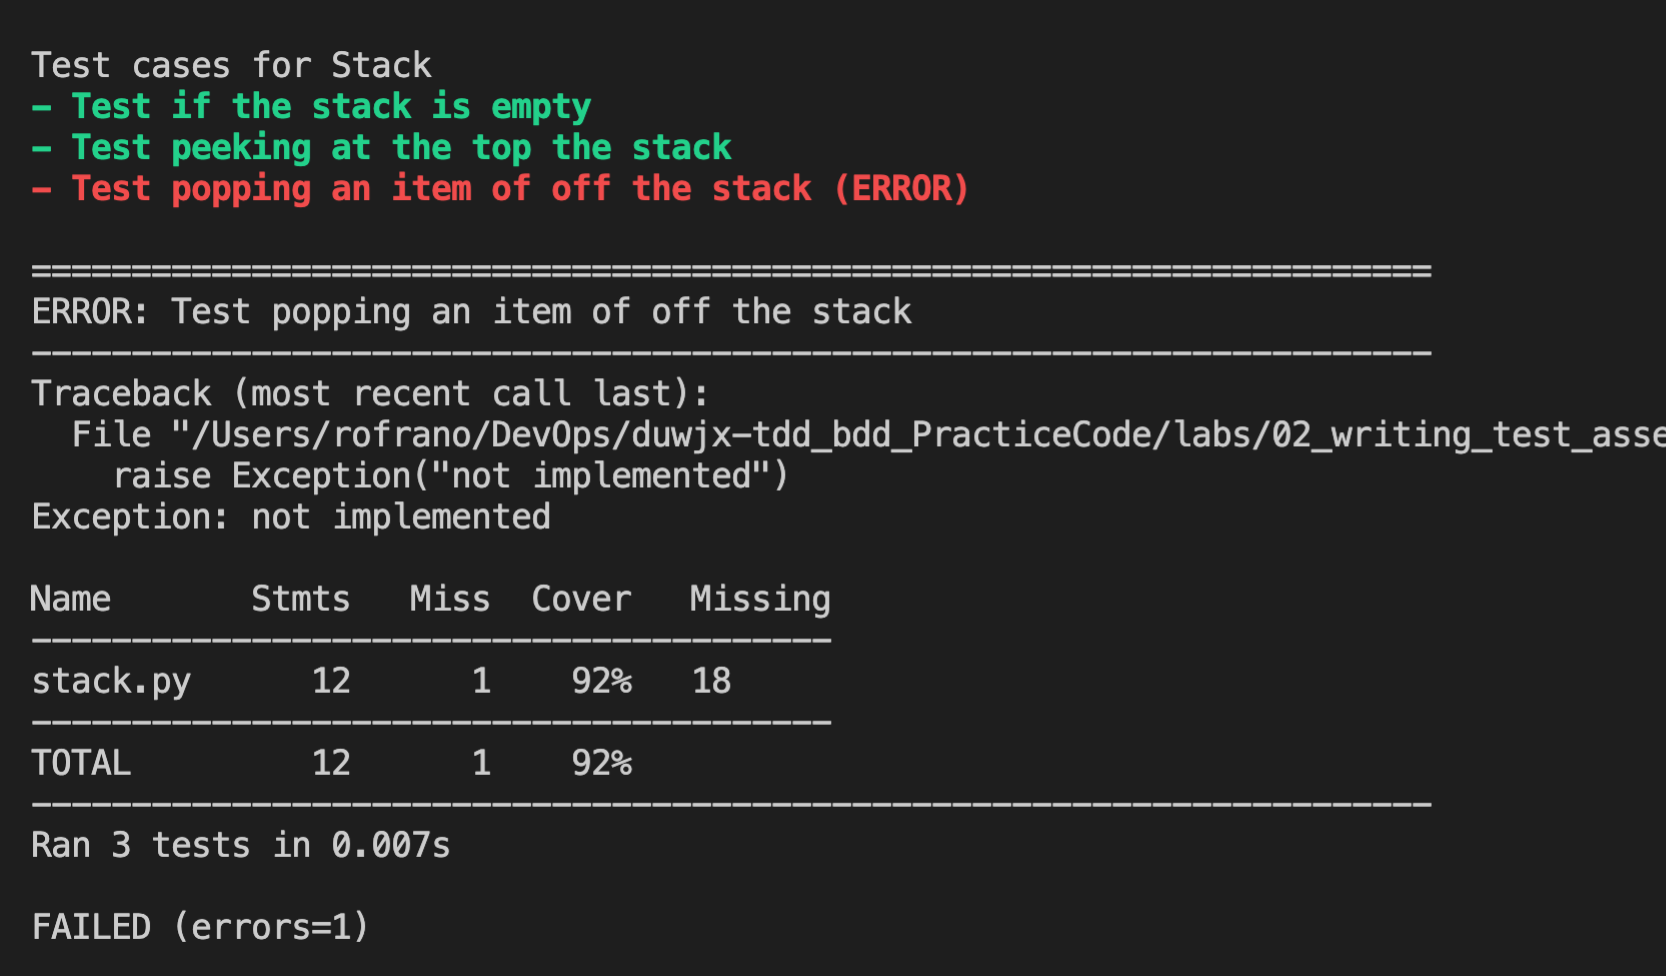

You should find that
* `Test peeking at the top the stack` **passed** and
* `Test popping an item of off the stack` is your **next failing test case**.

You're on `Test popping an item of off the stack` next.

# Step 3: Testing the pop() method

The next test case that you will implement is the `test_pop()` method.
* The `pop()` method **“pops off”** or **“removes”** the value on top of the stack and then returns that value. 
* To test this method, pushing just one value onto the stack isn't enough;
* The top and bottom would be the same.
* Therefore, just like when you tested `peek()`, you need to push two values onto the stack.
* That way, the stack has two values, and the top and bottom of the stack don’t point to the same value.

## Your Task

Write a test case for `pop()`.
* To test `pop()` you need something on the stack to remove.
* First you need to `push()` a value onto the stack.
* But does that give you enough for a useful test case?
* `pop()` should return the value at the top of the stack and return it.
* But if the stack only has one value, the top and the bottom are the same value.
* How do you know that `pop()` is not returning the value at the bottom of the stack?

This is the same problem that you confronted when testing `peek()`, and it has the same solution. You need to push a second value to make the bottom value and the top value different. Then you must **assert** that `pop()` returns that last value that you pushed onto the stack.

You also need to test that the item was removed. Remember that `peek()` will return the value at the top of the stack. Therefore, you can assert that calling `peek()` after `pop()` will return the previous value on the stack. This value should now be at the top.

## Solution

In [5]:
def test_pop(self):
    """Test popping an item of off the stack"""
    self.stack.push(3)
    self.stack.push(5)
    self.assertEqual(self.stack.pop(), 5)
    self.assertEqual(self.stack.peek(), 3)
    self.stack.pop()
    self.assertTrue(self.stack.is_empty())

## Test Your Solution

Let’s run **`nosetests --stop`** again and see if `test_peek()` passes.

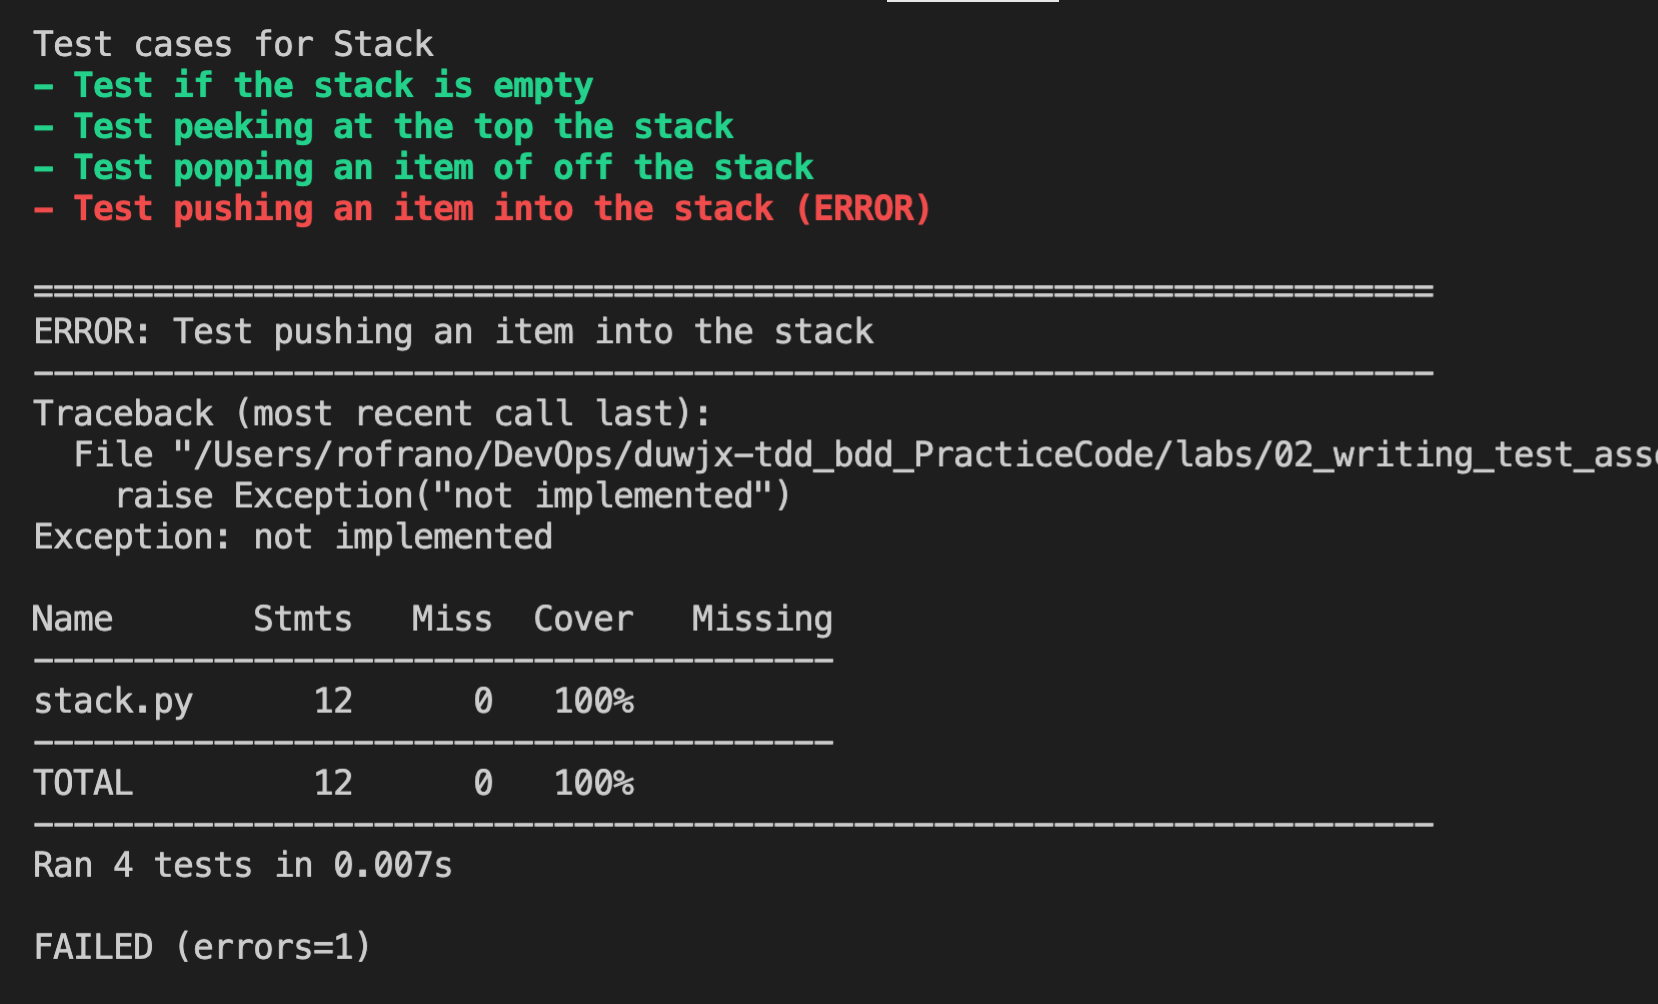

You should find that
* `Test popping an item of off the stack` **passed** and
* `Test pushing an item into the stack` is the **next failing test case**.

You're on **Test pushing an item into the stack** next.

# Step 4: Testing the push() method

The last test case you will implement is the `test_push()` method.

The `push()` method adds a value onto the top of the stack, and the stack grows with every new value pushed onto it. When you test this method, you should ensure that the value is added to the top of the stack, not the bottom.

## Your Task

Write a test case for `push()`.
* You will need to invoke the `push()` function and then assert that it behaved correctly.
* Then you can assert that if you `peek()` at the stack, `peek()` returns the value that you just pushed.
* Alternatively, you can assert that if you `pop()` the stack, `pop()` returns the value that you just pushed.
* Either of these assertions will do.

## Solution

In [7]:
def test_push(self):
    """Test pushing an item into the stack"""
    self.stack.push(3)
    self.assertEqual(self.stack.peek(), 3)
    self.stack.push(5)
    self.assertEqual(self.stack.peek(), 5)

## Test Your Solution

Run **`nosetests --stop`** one last time and see if `test_push()` passes.

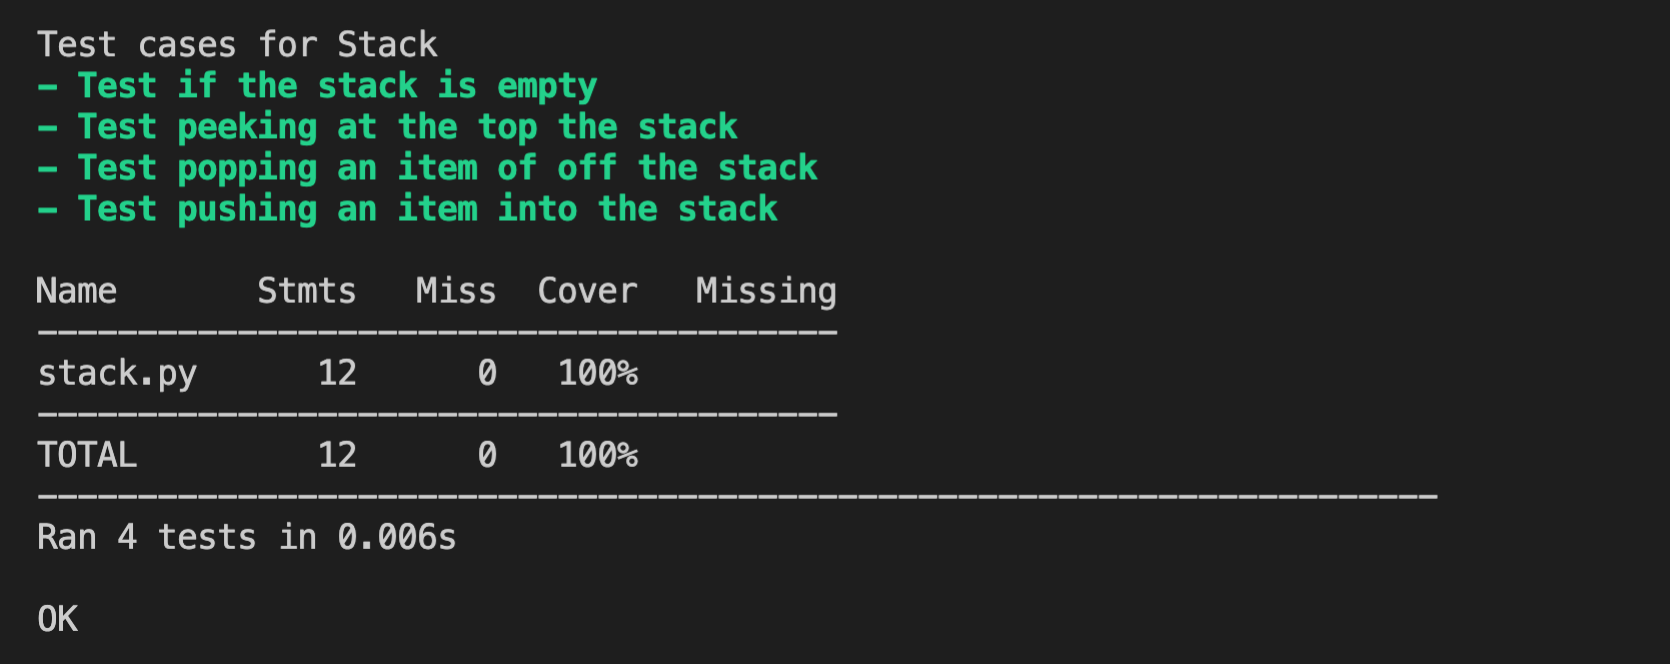

All of your tests are passing. Great job!